# A1-Q5: Sum of Fractions

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

## Some functions that you will use

In [2]:
def fl(x, t=14):
    '''
     xbar = fl(x, t=14)
     
     Finds the nearest floating-point value to x, using t mantissa
     digits, base-10.
    '''
    
    if x==0:
        return x
    
    d = np.floor( np.log10(abs(x)) + 1)
    
    x1 = x * 10.**(-d)
    
    x2 = np.round(x1, decimals=t)
    
    return x2*10.**d

In [3]:
# Computes the expression using IEEE double-precision
def F_exact(x):
    '''
     y = F_exact(x, t)
     
     Computes the expression using IEEE double-precision.
     
     Inputs:
      x is the x-value
      t is the number of mantissa digits for the arithmetic
      
     Output:
      y is the value of the expression
    '''
    return 1./(1.-x) - 1./(1.+x)

In [4]:
# Computes the expression using only t-digit arithmetic
def F_fp(x, t):
    '''
     y = F_fp(x, t)
     
     Computes the expression using t-digit arithmetic.
     
     Inputs:
      x is the x-value
      t is the number of mantissa digits for the arithmetic
      
     Output:
      y is the value of the expression
    '''

    xfp = fl(x, t=t)
    f1 = fl( 1./fl(1.-xfp, t=t) , t=t)
    f2 = fl( 1./fl(1.+xfp, t=t) , t=t)
    return fl(f1-f2, t=t)

## (a) Plot `F_exact` and `F_fp`

In [5]:
# Choose a range of x-values that yields inaccuracy.
x = np.linspace(-0.0005, 0.0005, 1000)
t = 4

In [6]:
# Evaluate the two functions.
y_exact = []
y_fp = []
for xx in x:
    y_exact.append(F_exact(xx))
    y_fp.append(F_fp(xx, t))

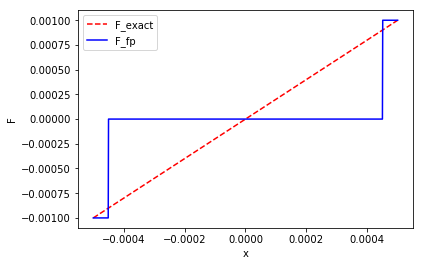

In [7]:
# Plot them together on the same axis.
# Notice the labeled axes, and the legend.
# (See plt.legend)
plt.plot(x, y_exact, 'r--');
plt.plot(x, y_fp, 'b');
plt.legend(('F_exact', 'F_fp'));
plt.xlabel('x'); plt.ylabel('F');
plt.savefig('blah.eps')

## (b) Derive a different formula

Here you can put $\LaTeX$ code. (Double-click to edit, then "run" the block to render.)
\begin{align}
F(x) &= \frac{1}{1-x} - \frac{1}{1+x} \\
 &= \frac{(1+x)-(1-x)}{(1-x)(1+x)} \\
 &= \frac{2x}{1-x^2}
\end{align}

## (c) Implement `F2_fp`

In [8]:
def F2_fp(x, t):
    '''
     y = F2_fp(x, t)
     
     Computes your alternative expression using t-digit arithmetic.
     
     Inputs:
      x is the x-value
      t is the number of mantissa digits for the arithmetic
      
     Output:
      y is the value of the expression
    '''

    #=== YOUR CODE HERE ===
    
    xfp = fl(x, t=t)
    f_numerator = fl(2.*xfp, t=t)
    f_1 = fl(xfp*xfp, t=t)
    f_denominator = fl(1.-f_1, t=t)
    
    return fl(f_numerator/f_denominator, t=t)

## (d) Plot `F_fp` and `F2_fp` together

In [9]:
# Evaluate the expressions over your chosen range of x
x = np.linspace(-0.0005, 0.0005, 1000)
t = 4

y_f2_fp = []
y_fp = []
for xx in x:
    y_f2_fp.append(F2_fp(xx, t))
    y_fp.append(F_fp(xx, t))

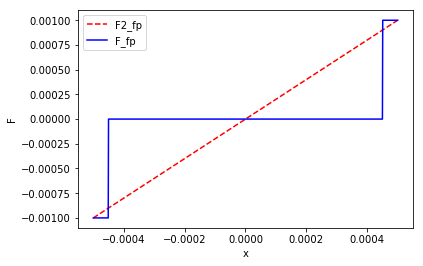

In [10]:
# and plot them on the same axis.
plt.plot(x, y_f2_fp, 'r--');
plt.plot(x, y_fp, 'b');
plt.legend(('F2_fp', 'F_fp'));
plt.xlabel('x'); plt.ylabel('F');
plt.savefig('blah.eps')